In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
columns_nm = ['Id','Entry','target','text']

In [3]:
df = pd.read_csv('twitter_training.csv', encoding = 'unicode_escape',names=columns_nm)

In [4]:
df

,Id,Entry,target,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
df['target'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [6]:
df['Entry'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [7]:
df['target'].value_counts(ascending=True)

target
Irrelevant    12990
Neutral       18318
Positive      20832
Negative      22542
Name: count, dtype: int64

In [8]:
colors =('#808080','#FFA500','#FFA500','#FF00FF')

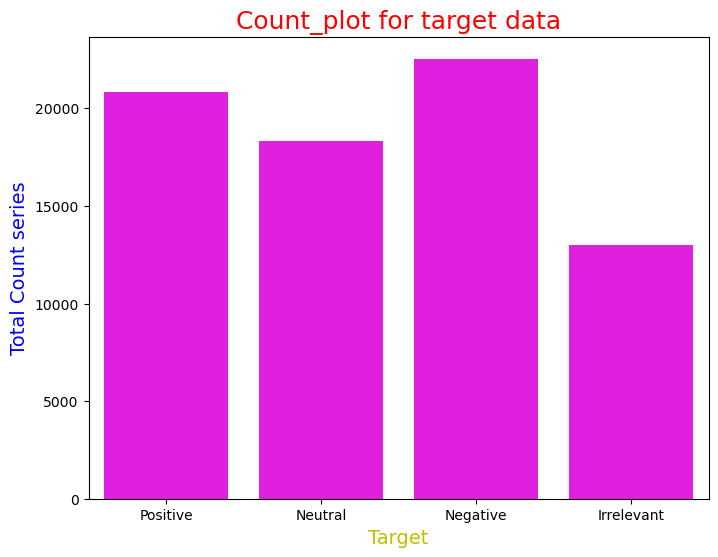

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(x='target', data=df, color='#FF00FF')
plt.title("Count_plot for target data", fontsize=18, c='r')
plt.ylabel("Total Count series", fontsize=14, c='b')
plt.xlabel("Target", fontsize=14, c='y')
plt.show()


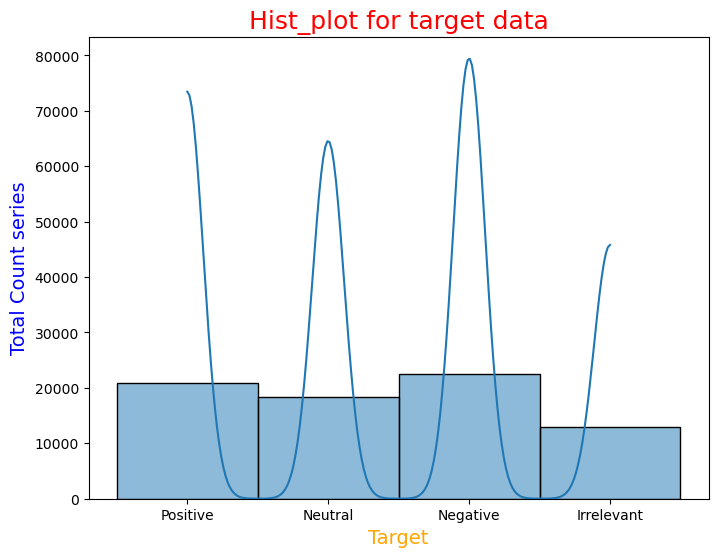

In [10]:
plt.figure(figsize=(8,6))
sns.histplot(x='target', data=df,  kde= True)
plt.title("Hist_plot for target data", fontsize=18, c='r')
plt.ylabel("Total Count series", fontsize=14, c='b')
plt.xlabel("Target", fontsize=14, c='#FFA500')
plt.show()


In [11]:
b=df['Entry'].value_counts()

In [12]:
b

Entry
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)         

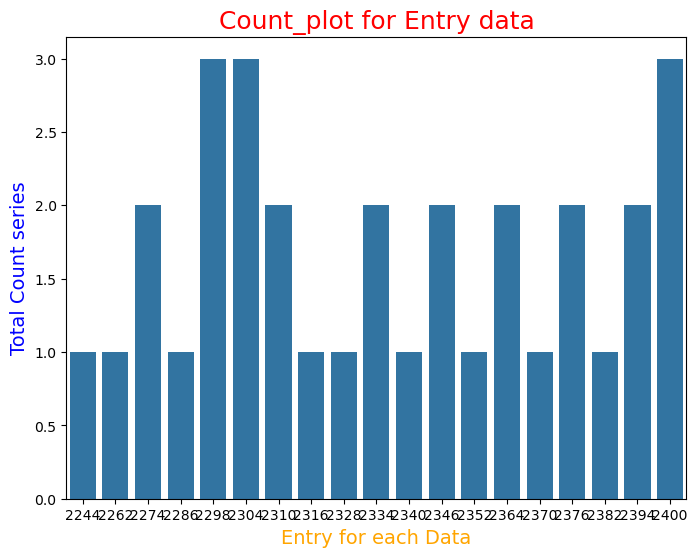

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x=b, data=df)
plt.title("Count_plot for Entry data", fontsize=18, c='r')
plt.ylabel("Total Count series", fontsize=14, c='b')
plt.xlabel("Entry for each Data", fontsize=14, c='#FFA500')
plt.show()

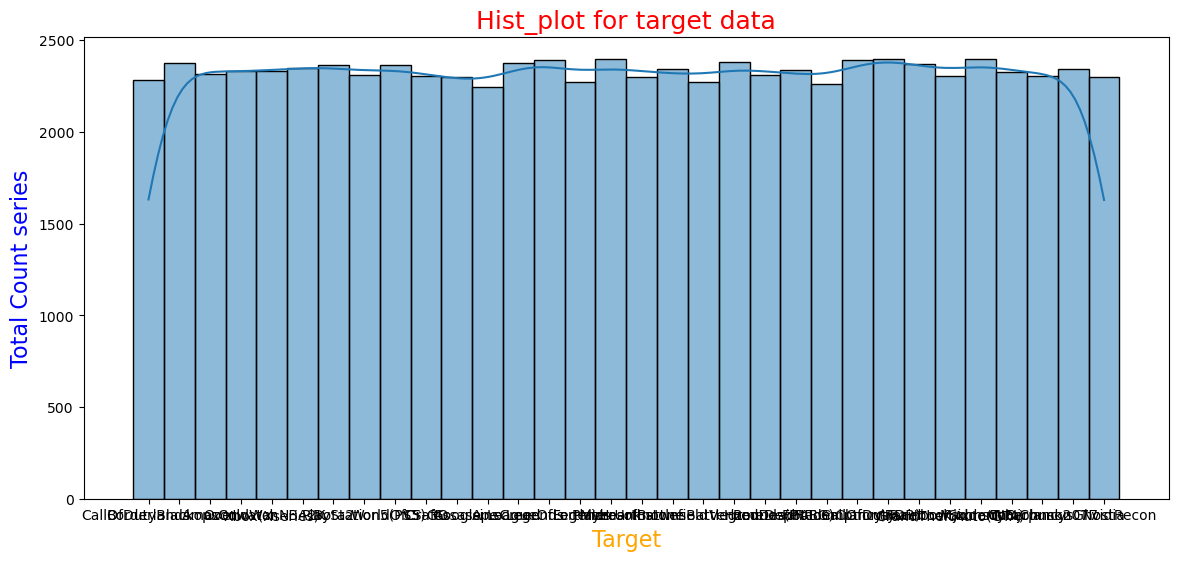

In [14]:
plt.figure(figsize=(14,6))
sns.histplot(x='Entry', data=df,  kde= True)
plt.title("Hist_plot for target data", fontsize=18, c='r')
plt.ylabel("Total Count series", fontsize=16, c='b')
plt.xlabel("Target", fontsize=16, c='#FFA500')
plt.show()

<Figure size 1400x1200 with 0 Axes>

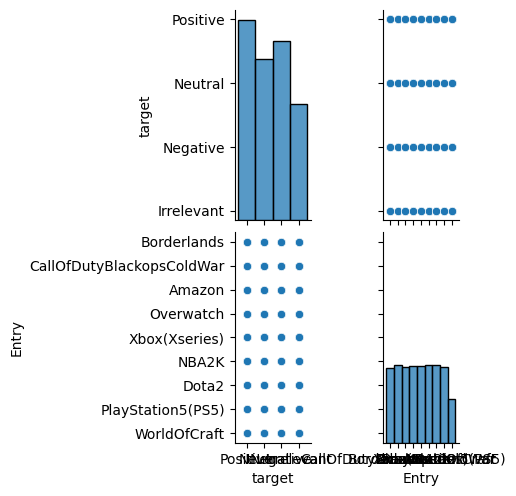

In [15]:
plt.figure(figsize = (14 , 12))
sns.pairplot(df[10:20000] , vars = ["target" , "Entry"] )
plt.show()

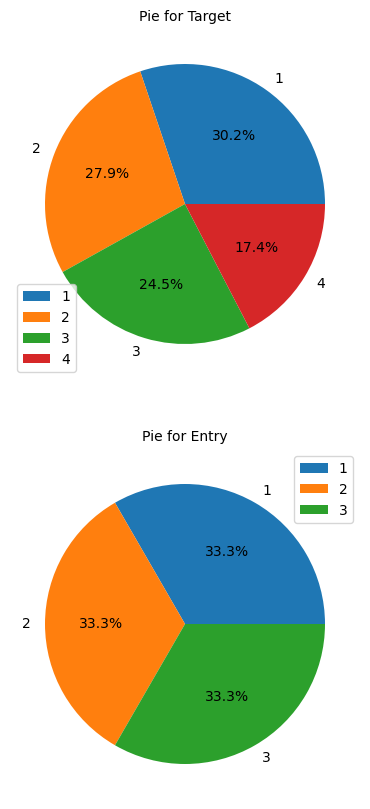

In [16]:
## Pie for Target and Entry columns

plt.figure(figsize = (10 , 10))
t = df["target"].value_counts()
labels = ["1" , "2" , "3" , "4"]
plt.subplot(2,1,1)
plt.pie(t , labels = labels , autopct = "%1.1f%%")
plt.legend()
plt.title("Pie for Target" , fontsize = 10 , c = "k")


ent = df["Entry"].value_counts().head(3)
labels = ["1" , "2" , "3"]
plt.subplot(2,1,2)
plt.pie(ent , labels = labels , autopct = "%1.1f%%")
plt.legend()
plt.title("Pie for Entry" , fontsize = 10 , c = "k")

plt.show()

In [17]:
df.duplicated().sum()

2701

# Data processing for model creation

In [18]:
df.head()

,Id,Entry,target,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [19]:
df.isnull().sum() # Null value finds

Id          0
Entry       0
target      0
text      686
dtype: int64

In [20]:
df['text'].fillna('unknown', inplace=True)
df["text"].replace("" , inplace = True)

In [21]:
df.isnull().sum()

Id        0
Entry     0
target    0
text      0
dtype: int64

In [22]:
#pip install wordcloud

In [23]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.stem import PorterStemmer , WordNetLemmatizer

In [24]:
nltk.download("stopwords")
nltk.download("words")
nltk.download("punkt")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
def processword(text):
    # smaller convert
    text = text.lower()

    # remove puntuations
    text = re.sub(r"[^\w\s]", "", text)

    # remove numbers
    text = re.sub(r"\d+", "", text)

    #split text into tokens
    tokens = word_tokenize(text)

    #remove stopwords
    stop_wprds = set(stopwords.words("English"))
    tokens = [word for word in tokens if word not in stop_wprds]

    # Stemmer
    stemmer = PorterStemmer()
    stemmer_token = [stemmer.stem(token) for token in tokens]

    ## Lemmatizer
    lematizer = WordNetLemmatizer()
    lemmatize_token = [lematizer.lemmatize(token) for token in stemmer_token]

    return " ".join(lemmatize_token)
df['process_text'] = df['text'].apply(processword)

# create bags of wrods representation using CountVectorizer

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(max_features=5000)
feature = v.fit_transform(df['process_text'])

In [27]:
feature

<74682x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 659718 stored elements in Compressed Sparse Row format>

In [28]:
feature_cv = feature.toarray()


In [29]:
feature_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
feature_cv.shape

(74682, 5000)

In [31]:
x = feature_cv[:30000]
y = df.target[:30000]

# train test split

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(x,y, random_state=32, test_size=0.2)

In [33]:
X_train.shape

(24000, 5000)

In [34]:
X_test.shape

(6000, 5000)

In [35]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Build model using Naive Bayesian classifier

In [36]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [37]:
nb.score(X_test,y_test)

0.6956666666666667

In [38]:
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)
print(f"Report : \n{classification_report(y_test,y_pred)}")

Report : 
              precision    recall  f1-score   support

  Irrelevant       0.68      0.52      0.59      1011
    Negative       0.73      0.75      0.74      1519
     Neutral       0.73      0.60      0.66      1509
    Positive       0.66      0.82      0.73      1961

    accuracy                           0.70      6000
   macro avg       0.70      0.67      0.68      6000
weighted avg       0.70      0.70      0.69      6000



# Confussion metrics

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
confu_matrix = confusion_matrix(y_test,y_pred)
print(f"Confussion matrix : \n {confu_matrix}")

Confussion matrix : 
 [[ 528  104  122  257]
 [  64 1135   95  225]
 [  98  177  903  331]
 [  86  146  121 1608]]


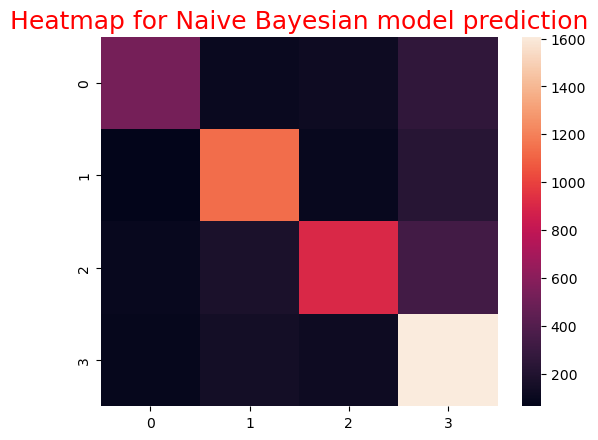

In [41]:
sns.heatmap(confu_matrix)
plt.title("Heatmap for Naive Bayesian model prediction", c ='r', fontsize=18)
plt.show()

# Build model using RandomForest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [43]:
model.score(X_test,y_test)

0.8838333333333334

In [46]:
y_pdict = model.predict(X_test)
rn_report = classification_report(y_test,y_pdict)
print(f"Report : \n{rn_report}")

Report : 
              precision    recall  f1-score   support

  Irrelevant       0.93      0.80      0.86      1011
    Negative       0.90      0.91      0.91      1519
     Neutral       0.82      0.90      0.86      1509
    Positive       0.90      0.90      0.90      1961

    accuracy                           0.88      6000
   macro avg       0.89      0.88      0.88      6000
weighted avg       0.89      0.88      0.88      6000



In [48]:
confu_matrix = confusion_matrix(y_test,y_pdict)
print(f"Confussion matrix : \n {confu_matrix}")

Confussion matrix : 
 [[ 808   40  102   61]
 [  15 1381   77   46]
 [  19   50 1354   86]
 [  24   55  122 1760]]


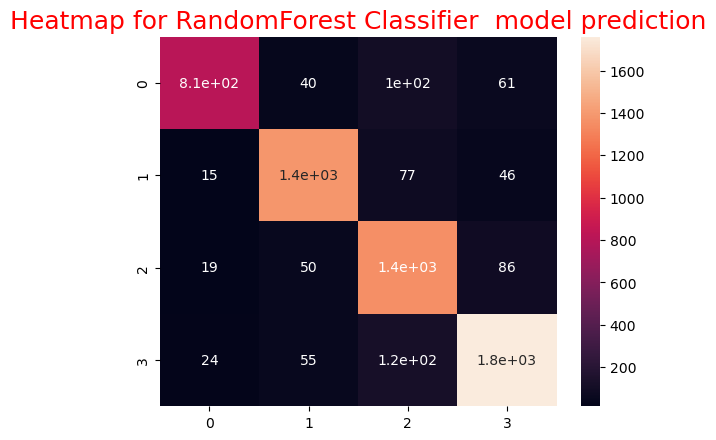

In [55]:
sns.heatmap(confu_matrix, annot=True)
plt.title("Heatmap for RandomForest Classifier  model prediction", c ='r', fontsize=18)
plt.show()

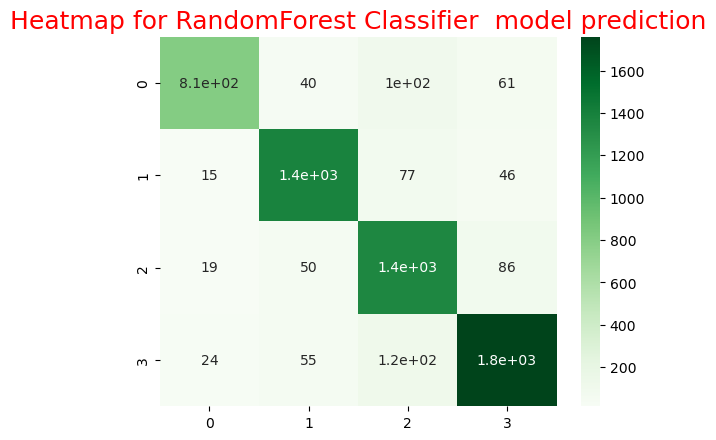

In [56]:
sns.heatmap(confu_matrix, annot=True, cmap='Greens')
plt.title("Heatmap for RandomForest Classifier  model prediction", c ='r', fontsize=18)
plt.show()

# Build model using DecisionTree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
tree_model.score(X_test,y_test)

0.8055

In [60]:
y_pred = tree_model.predict(X_test)
tree_report = classification_report(y_test,y_pred)
print(f"DecisionTree Report : \n{tree_report}")

DecisionTree Report : 
              precision    recall  f1-score   support

  Irrelevant       0.79      0.70      0.74      1011
    Negative       0.84      0.83      0.84      1519
     Neutral       0.73      0.83      0.78      1509
    Positive       0.85      0.82      0.84      1961

    accuracy                           0.81      6000
   macro avg       0.80      0.80      0.80      6000
weighted avg       0.81      0.81      0.81      6000



In [61]:
confu_matrix = confusion_matrix(y_test,y_pred)
print(f"confusion_matrix : \n\n {confu_matrix}")

confusion_matrix : 

 [[ 707   63  139  102]
 [  50 1263  136   70]
 [  67   84 1247  111]
 [  71   96  178 1616]]


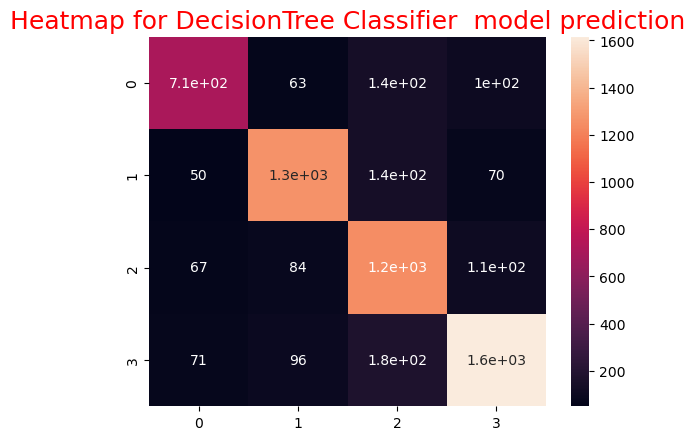

In [63]:
sns.heatmap(confu_matrix, annot=True)
plt.title("Heatmap for DecisionTree Classifier  model prediction", c ='r', fontsize=18)
plt.show()

# prediction using randomForest model

In [67]:
def predict_sentiment(Text):
    processed_Text = processword(Text)

    # Transform the preprocessed text into CountVectorizer vectors
    X_new = v.transform([processed_Text])

    # Make predictions
    predicted_sentiment = model.predict(X_new) # prediction using RandomForest model

    # Print the predicted sentiment
    print("Predicted sentiment:", predicted_sentiment)

In [69]:
predict_sentiment("i love this film")

Predicted sentiment: ['Positive']


In [70]:
predict_sentiment("i hate this film")

Predicted sentiment: ['Negative']


# prediction using Naive bayesian model

In [71]:
def predict_sentiment(Text):
    processed_Text = processword(Text)

    # Transform the preprocessed text into CountVectorizer vectors
    X_new = v.transform([processed_Text])

    # Make predictions
    predicted_sentiment = nb.predict(X_new) # prediction using Naive bayesian model

    # Print the predicted sentiment
    print("Predicted sentiment:", predicted_sentiment)

In [72]:
predict_sentiment("i love this film")

Predicted sentiment: ['Positive']


In [73]:
predict_sentiment("i hate this film")

Predicted sentiment: ['Irrelevant']
